In [2]:
import os
import kraken
from kraken import binarization
from kraken import pageseg
from kraken import rpred
from kraken import blla
from kraken.lib import vgsl
from kraken.binarization import nlbin
from kraken.lib.models import load_any
from PIL import Image
import torch # 


In [3]:
torch.cuda.get_arch_list()

['sm_37',
 'sm_50',
 'sm_60',
 'sm_61',
 'sm_70',
 'sm_75',
 'sm_80',
 'sm_86',
 'sm_90',
 'compute_37']

In [4]:
torch.get_file_path()

'C:\\Users\\User\\anaconda3\\envs\\cuda_env\\lib\\site-packages'

In [5]:

print("PyTorch version:", torch.__version__)
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

if torch.cuda.is_available():
    print("CUDA device name:", torch.cuda.get_device_name(0))


PyTorch version: 2.3.0+cu118
Is CUDA available: True
CUDA version: 11.8
CUDA device name: NVIDIA GeForce RTX 2080 Super with Max-Q Design


In [6]:
# can be any supported image format and mode
im = Image.open('trial_image_1.jpeg')
bw_im = binarization.nlbin(im)

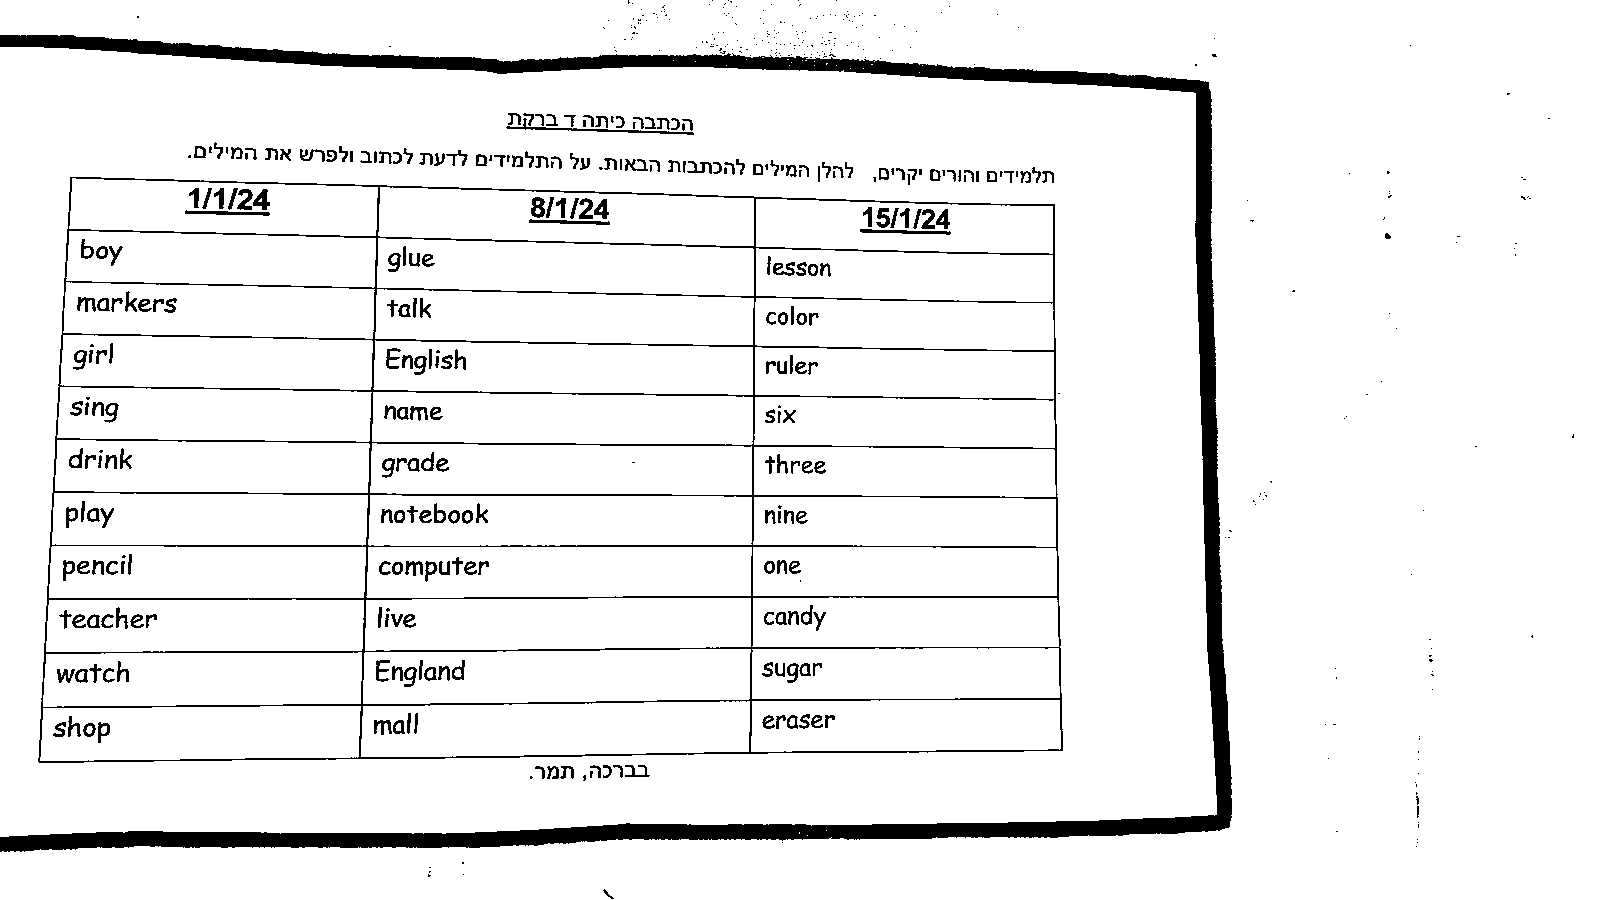

In [7]:
bw_im

In [8]:
seg = pageseg.segment(bw_im)
seg

Segmentation(type='bbox', imagename=None, text_direction='horizontal-lr', script_detection=False, lines=[BBoxLine(id='a28733ff-e972-49ab-b7fc-7439274c47b5', bbox=[80, 239, 122, 266], text=None, base_dir=None, type='bbox', imagename=None, tags=None, split=None, regions=None, text_direction='horizontal-lr'), BBoxLine(id='9395ba80-584d-4ecc-9bdd-59fce354e4c2', bbox=[76, 291, 176, 313], text=None, base_dir=None, type='bbox', imagename=None, tags=None, split=None, regions=None, text_direction='horizontal-lr'), BBoxLine(id='e82ff0d0-1f37-4782-8c2c-f75f6b92bd06', bbox=[72, 343, 112, 370], text=None, base_dir=None, type='bbox', imagename=None, tags=None, split=None, regions=None, text_direction='horizontal-lr'), BBoxLine(id='614e1753-5d1c-4fd9-8ed8-8a5d69f82586', bbox=[69, 397, 118, 423], text=None, base_dir=None, type='bbox', imagename=None, tags=None, split=None, regions=None, text_direction='horizontal-lr'), BBoxLine(id='775e3b9d-92c0-4ff8-85be-599d752fc59d', bbox=[68, 448, 131, 469], text=

In [9]:
seg.lines[-1].bbox #coordinate of box, needs to be converted to tuple

[860, 209, 950, 235]

In [10]:
from PIL import Image, ImageDraw

# Define the coordinates for the rectangle
# Example: [(0, 0), (1222, 0), (0, 735), (1222, 735)]
# We need only the top-left and bottom-right corners for a rectangle
rectangle_coords = [(154, 549), (754, 591)]# [229, 288, 1077, 396], [494, 702, 1214, 817]]#need to fix the coordeinates to be tuples. 

# Load the image
image = im

# Convert the image to RGB mode if it's not
if image.mode != 'RGB':
    image = image.convert('RGB')

# Create a drawing context
draw = ImageDraw.Draw(image)

# Draw the rectangle
# The rectangle function expects the top-left and bottom-right corners as input
draw.rectangle([rectangle_coords[0], rectangle_coords[1]], outline="red", width=3)

# Display the image with the drawn rectangle
image.show()


In [11]:
image.close()

In [32]:
#until now, kraken is operated via the notebook. a pic is loaded and segmented, and the resulting boxes can be displayed
#from here, i used tutorials which interact via cmd command line, so its a bit incosistent. 
# when running the cmd commands, dont forget to add the gpu flag: !ketos segtrain -d cuda -f xml training_data/*.xml

In [12]:
!kraken get 10.5281/zenodo.10592716


Processing -------------------------------------   0% 0/0 bytes -:--:-- 0:00:00
Processing -------------------------------------   0% 0/0 bytes -:--:-- 0:00:01
Processing -------------------------------------   0% 0/0 bytes 0:00:00 0:00:01
Processing -- --------------------------------   7% 1.7/22.9 MB 0:00:03 0:00:03
Processing ------------------------ ---------  72% 16.4/22.9 MB 0:00:01 0:00:04
Processing ---------------------------------- 100% 22.9/22.9 MB 0:00:00 0:00:04
Model name: catmus-print-fondue-large.mlmodel


In [5]:
!kraken get "10.5281/zenodo.5468478" 


Processing -------------------------------------   0% 0/0 bytes -:--:-- 0:00:00
Processing -------------------------------------   0% 0/0 bytes 0:00:00 0:00:00
Processing -----------------------------------   0% 0.0/16.1 MB -:--:-- 0:00:02
Processing -------------------------- -------  77% 12.4/16.1 MB 0:00:01 0:00:03
Processing ---------------------------------- 100% 16.1/16.1 MB 0:00:00 0:00:03
Model name: Ashkenazi_01.mlmodel


In [13]:
os.environ['PYTHONIOENCODING'] = 'utf-8' # maybe add this to system variables?

!kraken -i trial_image_1.jpeg OUTPUT_FILE.txt binarize segment ocr -m catmus-print-fondue-large.mlmodel

Loading ANN catmus-print-fondue-large.mlmodel	ג�“
Binarizing	ג�“
Segmenting	ג�“
[04/30/24 19:35:00] WARNING  Recognizers with segmentation types   rpred.py:103
                             {'baselines'} will be applied to                  
                             segmentation of type bbox. This will              
                             likely result in severely degraded                
                             performace                                        

Processing ----------------------------------------   0% 0/38 -:--:-- 0:00:00
Processing ---------------------------------------- 100% 38/38 0:00:00 0:00:00
Writing recognition results for trial_image_1.jpeg	ג�“


scikit-learn version 1.2.2 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
Torch version 2.3.0+cu118 has not been tested with coremltools. You may run into unexpected errors. Torch 2.0.0 is the most recent version that has been tested.


In [9]:
kraken.rpred.

Binarizing	[04/29/24 19:55:46] ERROR    Failed processing IDGNAZIM0005.tif:  kraken.py:429
                             'charmap' codec can't encode                      
                             character '\u2713' in position 0:                 
                             character maps to <undefined>                     


In [14]:
! kraken -i "Images/IDGNAZIM0005.tif" image.txt segment -bl ocr -m catmus-print-fondue-large.mlmodel

Loading ANN C:\Users\User\anaconda3\envs\cuda_env\lib\site-packages\kraken\blla.mlmodel	


scikit-learn version 1.2.2 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
Torch version 2.3.0+cu118 has not been tested with coremltools. You may run into unexpected errors. Torch 2.0.0 is the most recent version that has been tested.
+--------------------- Traceback (most recent call last) ---------------------+
| C:\Users\User\anaconda3\envs\cuda_env\lib\runpy.py:194 in                   |
| _run_module_as_main                                                         |
|                                                                             |
|   191     main_globals = sys.modules["__main__"].__dict__                   |
|   192     if alter_argv:                                                    |
|   193         sys.argv[0] = mod_spec.origin                                 |
| > 194     return _run_code(code, main_globals, None,                        |
|   195                      "__main__", mod_spec)

In [11]:
!ketos segtrain -f alto -i XMLS/*.xml


scikit-learn version 1.2.2 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
Torch version 2.2.1+cu121 has not been tested with coremltools. You may run into unexpected errors. Torch 2.0.0 is the most recent version that has been tested.
+--------------------- Traceback (most recent call last) ---------------------+
| C:\Users\User\anaconda3\lib\runpy.py:194 in _run_module_as_main             |
|                                                                             |
|   191     main_globals = sys.modules["__main__"].__dict__                   |
|   192     if alter_argv:                                                    |
|   193         sys.argv[0] = mod_spec.origin                                 |
| > 194     return _run_code(code, main_globals, None,                        |
|   195                      "__main__", mod_spec)                            |
|   196                                           

In [7]:

def process_image(image_path):
    # Binarize the image
    im = Image.open(image_path)
    bin_im = nlbin(im)

    # Segment the page into text regions
    segments = pageseg.segment(bin_im)['boxes']

    # Load the OCR model
    ocr_model = rpred.rpred(network=load_any('en_best.mlmodel'))

    # Perform OCR on the text regions
    ocr_results = ocr_model.predict(im=bin_im, bounds=segments)

    # Print or store the OCR results
    for result in ocr_results:
        print(result.prediction)
        
if __name__ == '__main__':
        image_directory = 'Images'
        for image_file in os.listdir(image_directory)[:20]:
            image_path = os.path.join(image_directory, image_file)
            process_image(image_path)


TypeError: 'Segmentation' object is not subscriptable